# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv).

In [4]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv"

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [5]:
online_rt = pd.read_csv(url, encoding='ISO-8859-1')

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

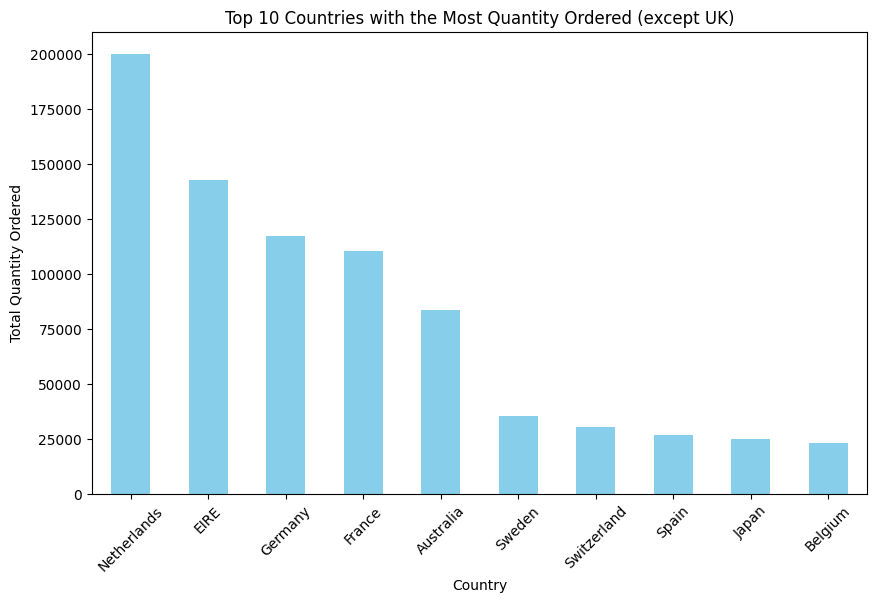

In [6]:
# Nhóm dữ liệu theo quốc gia và tính tổng số lượng đặt hàng
country_quantity = online_rt.groupby('Country')['Quantity'].sum()

# Loại bỏ quốc gia UK nếu có
country_quantity = country_quantity.drop('United Kingdom')

# Lấy ra 10 quốc gia có số lượng đặt hàng nhiều nhất
top_10_countries = country_quantity.nlargest(10)

# Vẽ histogram
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Quantity Ordered (except UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

### Step 5.  Exclude negative Quantity entries

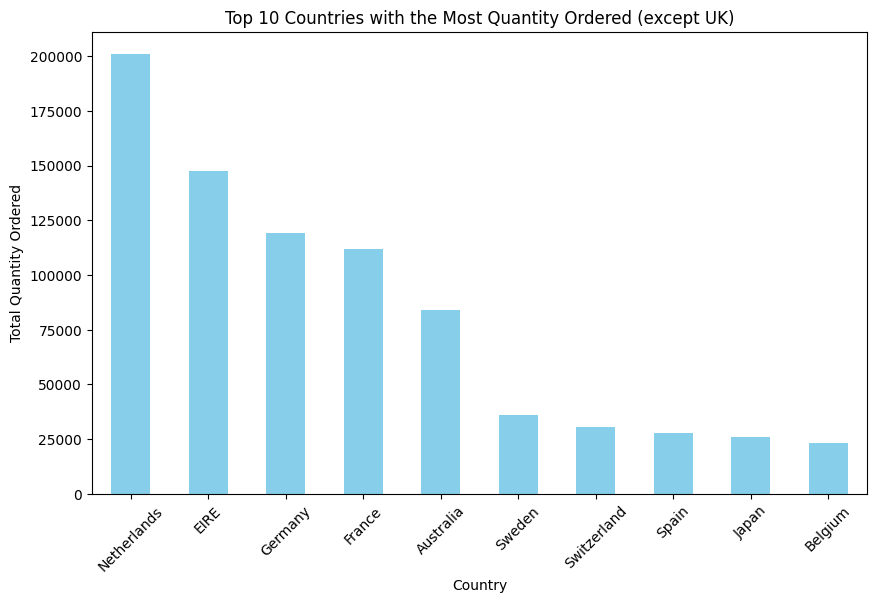

In [8]:
# Lọc bỏ các mục có số lượng âm
online_rt = online_rt[online_rt['Quantity'] > 0]

# Nhóm dữ liệu theo quốc gia và tính tổng số lượng đặt hàng
country_quantity = online_rt.groupby('Country')['Quantity'].sum()

# Loại bỏ quốc gia UK nếu có
country_quantity = country_quantity.drop('United Kingdom', errors='ignore')

# Lấy ra 10 quốc gia có số lượng đặt hàng nhiều nhất
top_10_countries = country_quantity.nlargest(10)

# Vẽ histogram
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Quantity Ordered (except UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

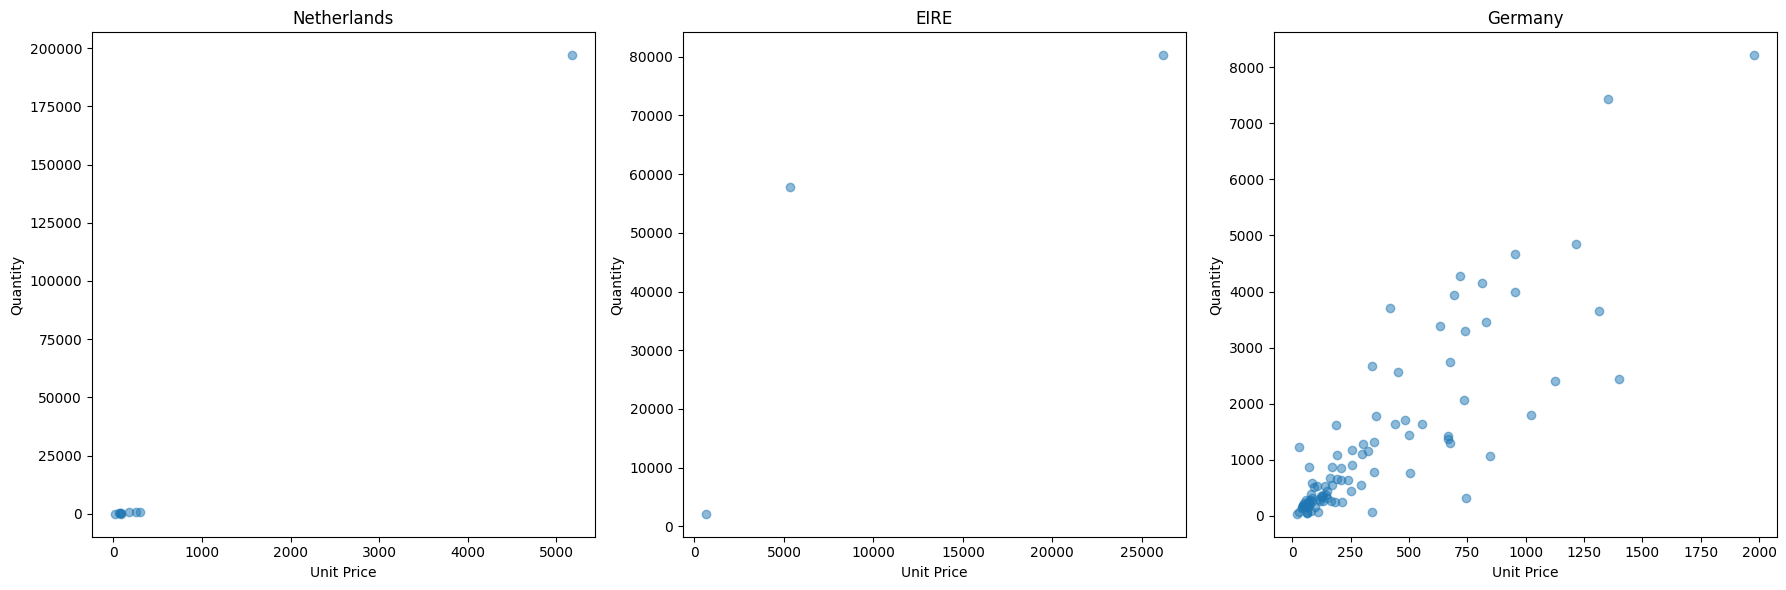

In [10]:
# Lọc dữ liệu cho các quốc gia hàng đầu (ngoại trừ UK)
top_countries = online_rt[online_rt['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]

# Loại bỏ các hàng có số lượng âm và giá tiền âm
top_countries = top_countries[(top_countries['Quantity'] > 0) & (top_countries['UnitPrice'] > 0)]

# Tính số lượng trên mỗi đơn giá theo CustomerID
quantity_per_unitprice = top_countries.groupby(['Country', 'CustomerID'])[['Quantity', 'UnitPrice']].sum()

# Tạo biểu đồ phân tán cho từng quốc gia
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
countries = ['Netherlands', 'EIRE', 'Germany']
for i, country in enumerate(countries):
    data = quantity_per_unitprice.loc[country]
    axes[i].scatter(data['UnitPrice'], data['Quantity'], alpha=0.5)
    axes[i].set_title(country)
    axes[i].set_xlabel('Unit Price')
    axes[i].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [11]:
# Lọc dữ liệu cho các quốc gia hàng đầu (ngoại trừ UK)
top_countries = online_rt[online_rt['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]

# Hiển thị một số dòng đầu tiên của DataFrame đã lọc
print(top_countries.head())

     InvoiceNo StockCode                          Description  Quantity  \
385     536403     22867              HAND WARMER BIRD DESIGN        96   
386     536403      POST                              POSTAGE         1   
1109    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1110    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
1111    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   

        InvoiceDate  UnitPrice  CustomerID      Country  
385   12/1/10 11:27       1.85     12791.0  Netherlands  
386   12/1/10 11:27      15.00     12791.0  Netherlands  
1109  12/1/10 13:04       2.95     12662.0      Germany  
1110  12/1/10 13:04       2.55     12662.0      Germany  
1111  12/1/10 13:04       0.85     12662.0      Germany  


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [12]:
top_countries = online_rt[online_rt['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [13]:
# Lọc dữ liệu cho CustomerIDs 12346.0 và 12347.0
customer_data = online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]

# Hiển thị dữ liệu cho CustomerIDs 12346.0 và 12347.0
print(customer_data)

       InvoiceNo StockCode                          Description  Quantity  \
14938     537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
14939     537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940     537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941     537626     22492              MINI PAINT SET VINTAGE         36   
14942     537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
...          ...       ...                                  ...       ...   
535010    581180     20719               WOODLAND CHARLOTTE BAG        10   
535011    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
535012    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
535013    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
535014    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

          InvoiceDate  UnitPrice  CustomerID  Country  
14938   12/7/10 14:

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

##### Step 7.2.2

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [12]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [14]:
# Loại bỏ các hàng có số lượng hoặc giá tiền âm
online_rt = online_rt[(online_rt['Quantity'] > 0) & (online_rt['UnitPrice'] > 0)]

# Tính tổng số tiền mỗi khách hàng chi trung bình trên mỗi đơn vị
online_rt['TotalAmount'] = online_rt['Quantity'] * online_rt['UnitPrice']
avg_price_per_unit = online_rt.groupby(['CustomerID', 'Country'])['TotalAmount', 'Quantity'].sum()
avg_price_per_unit['AvgPrice'] = avg_price_per_unit['TotalAmount'] / avg_price_per_unit['Quantity']

# Hiển thị kết quả
print(avg_price_per_unit)

                           TotalAmount  Quantity  AvgPrice
CustomerID Country                                        
12346.0    United Kingdom     77183.60     74215  1.040000
12347.0    Iceland             4310.00      2458  1.753458
12348.0    Finland             1797.24      2341  0.767723
12349.0    Italy               1757.55       631  2.785341
12350.0    Norway               334.40       197  1.697462
...                                ...       ...       ...
18280.0    United Kingdom       180.60        45  4.013333
18281.0    United Kingdom        80.82        54  1.496667
18282.0    United Kingdom       178.05       103  1.728641
18283.0    United Kingdom      2094.88      1397  1.499556
18287.0    United Kingdom      1837.28      1586  1.158436

[4346 rows x 3 columns]


<ipython-input-14-6df1dd3867ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt['TotalAmount'] = online_rt['Quantity'] * online_rt['UnitPrice']
<ipython-input-14-6df1dd3867ee>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_price_per_unit = online_rt.groupby(['CustomerID', 'Country'])['TotalAmount', 'Quantity'].sum()


##### Step 7.3.3 Plot

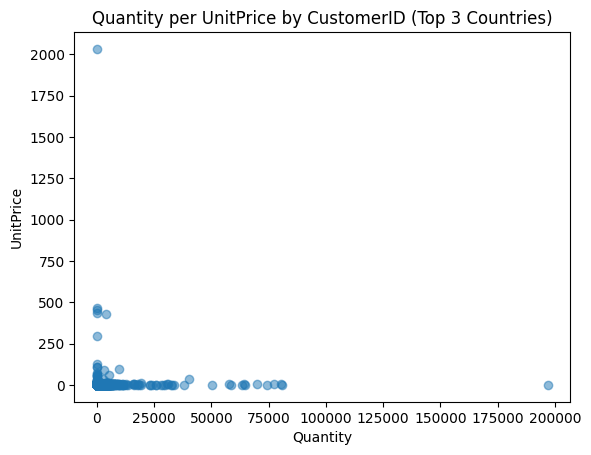

In [13]:
customer_data = online_rt.groupby(['CustomerID', 'Country']).agg({'Quantity': 'sum', 'Revenue': 'sum', 'UnitPrice': 'mean'}).reset_index()
plt.scatter(customer_data['Quantity'], customer_data['UnitPrice'], alpha=0.5)
plt.title('Quantity per UnitPrice by CustomerID (Top 3 Countries)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [9]:
pip install --upgrade matplotlib


#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

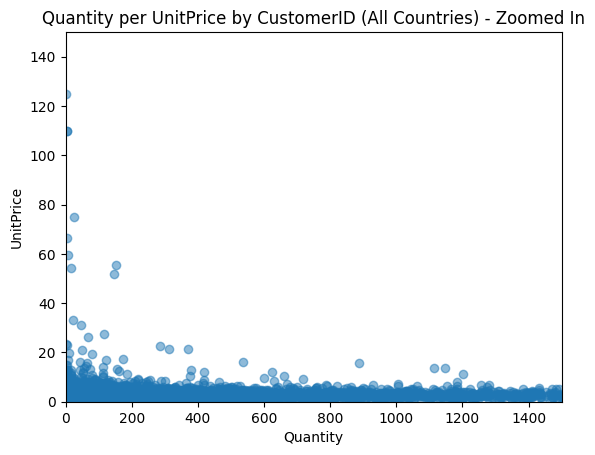

In [20]:
plt.scatter(customer_data_all['Quantity'], customer_data_all['UnitPrice'], alpha=0.5)
plt.title('Quantity per UnitPrice by CustomerID (All Countries) - Zoomed In')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xlim(0, 1500)
plt.ylim(0, 150)
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

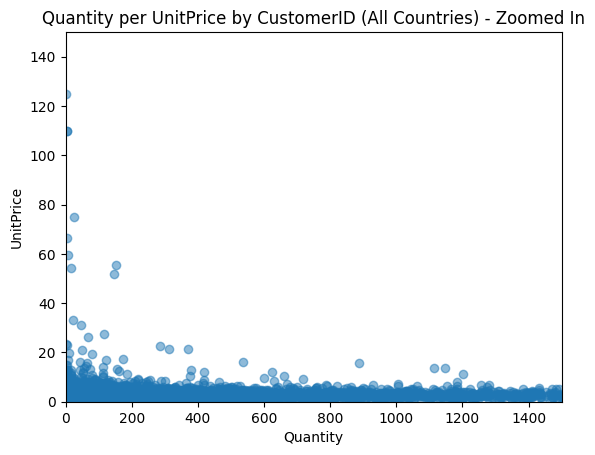

In [22]:
plt.scatter(customer_data_all['Quantity'], customer_data_all['UnitPrice'], alpha=0.5)
plt.title('Quantity per UnitPrice by CustomerID (All Countries) - Zoomed In')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.xlim(0, 1500)
plt.ylim(0, 150)
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

#### 8.3 Plot.

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

### BONUS: Create your own question and answer it.